<a href="https://colab.research.google.com/github/lcnychh/da_nychh/blob/master/DA_Unit3_L3%264_07242020_Part2_LC_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 1 - COVID-19 Data Analysis**

**The Data Background**

The following is noted from the datasource link:

The New York Times is releasing a series of data files with **cumulative counts** of coronavirus cases in the United States, at the state and county level, over time. We are compiling this time series data from state and local governments and health departments in an attempt to provide a complete record of the ongoing outbreak.

Since late January, The Times has tracked cases of coronavirus in real time as they were identified after testing. Because of the widespread shortage of testing, however, the data is necessarily limited in the picture it presents of the outbreak.

The data begins with the first reported coronavirus case in Washington State on Jan. 21, 2020.

The Times are providing two sets of data with cumulative counts of coronavirus cases and deaths: one with most current numbers for each geography and another with **historical data showing the tally for each day for each geography.**

The historical data files are at the top level of the directory and contain data up to, but not including the current day. The live data files are in the live/ directory.

A key difference between the historical and live files is that the numbers in the **historical files are the final counts at the end of each day**, while the live files have figures that may be a partial count released during the day but cannot necessarily be considered the final, end-of-day tally.

Each row of data reports the cumulative number of coronavirus cases and deaths based on our best reporting up to the moment we publish an update. Our counts include both laboratory confirmed and probable cases using criteria that were developed by states and the federal government. Not all geographies are reporting probable cases and yet others are providing confirmed and probable as a single total.

**State and county files contain FIPS codes, a standard geographic identifier,** to make it easier for an analyst to combine this data with other data sets like a map file or population data.

***Please note: The historical data is used for this analysis (not the live data).***

**Research Questions**

Please note: Since New York Times data is updated daily, answers are based on data ran as of 7/27/2020, 12:55am (date of completion of project).

* Research Question - 1 - Insight into raw data - How 
many records/ columns?  There are 7,989 rows and 5 columns.

* Research Question - 2 - Was there subsetting data by state? Yes, subset is New York.

* Research Question - 3 - Were new columns added?  Yes, since cases and deaths are cumulative, new cases, new deaths, percent change per day were created.

* Research Question - 4 - Were visuals/ plots/ graphs/ figures used? Yes, Pandas functions were used to pivot the dataframe to get the month-wise case count for New York.

* Research Question - 5 - Were other libraries used?  Yes, plotly library was explored in order to make interactive plots/ graphs.

The following libraries were imported:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')

**All States data for Covid-19**

In [ ]:
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


^As noted, the data begins with the first reported coronavirus case in Washington State on Jan. 21, 2020.

In [ ]:
df.shape

(7989, 5)

In [ ]:
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

^There are 7,989 datapoints and 5 features in the dataframe.

**New York data for Covid-19**

In [ ]:
ny_df = df[df['state']=='New York']

In [ ]:
ny_df.head()

,date,state,fips,cases,deaths
246,2020-03-01,New York,36,1,0
261,2020-03-02,New York,36,1,0
276,2020-03-03,New York,36,2,0
293,2020-03-04,New York,36,11,0
313,2020-03-05,New York,36,22,0


^First case in New York is on March 1, 2020.

In [ ]:
ny_df.shape

(147, 5)

^There are 147 columns and 5 columns for the New York subset.

In [ ]:
ny_df.tail()

,date,state,fips,cases,deaths
7747,2020-07-21,New York,36,412889,32218
7802,2020-07-22,New York,36,413595,32228
7857,2020-07-23,New York,36,414405,32270
7912,2020-07-24,New York,36,415163,32278
7967,2020-07-25,New York,36,415911,32295


^As of July 25, 2020, there are 415,911 cases and 32,295 deaths.

In [ ]:
#first death in NY
first_ny_death = ny_df[ny_df['deaths']!=0]
first_ny_death.head()

,date,state,fips,cases,deaths
669,2020-03-14,New York,36,610,2
722,2020-03-15,New York,36,732,6
775,2020-03-16,New York,36,950,10
828,2020-03-17,New York,36,1375,18
882,2020-03-18,New York,36,2387,32


^First death in New York is on March 14, 2020 with 610 cases accumulated up to that day.

In [ ]:
#total number of cases
ny_df['cases'].max()

415911

In [ ]:
# not a correct way of calculating total count bcoz data is cumulative
ny_df['cases'].sum()

39483337

**Data Wrangling - extracting and adding new variables**

Adding new_cases column

In [ ]:
#new cases for NY
# type(ny_df['cases'])

newcase = []
previuos_case = 0
for index, row in ny_df.iterrows():
  current_case = row['cases']
  newcase_count = current_case - previuos_case
  previuos_case = current_case
  newcase.append(newcase_count)
  # print(newcase_count)

In [ ]:
ny_df['new_cases'] = newcase

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
ny_df.head(10)

,date,state,fips,cases,deaths,new_cases
246,2020-03-01,New York,36,1,0,1
261,2020-03-02,New York,36,1,0,0
276,2020-03-03,New York,36,2,0,1
293,2020-03-04,New York,36,11,0,9
313,2020-03-05,New York,36,22,0,11
338,2020-03-06,New York,36,44,0,22
369,2020-03-07,New York,36,89,0,45
404,2020-03-08,New York,36,106,0,17
440,2020-03-09,New York,36,142,0,36
478,2020-03-10,New York,36,173,0,31


Adding new_deaths column

In [ ]:
#new deaths for NY
# type(ny_df['deaths'])

newdeath = []
previous_death = 0
for index, row in ny_df.iterrows():
  current_death = row['deaths']
  newdeath_count = current_death - previous_death
  previous_death = current_death
  newdeath.append(newdeath_count)
  # print(newdeath_count)

In [ ]:
ny_df['new_deaths'] = newdeath

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
ny_df.head(10)

,date,state,fips,cases,deaths,new_cases,new_deaths
246,2020-03-01,New York,36,1,0,1,0
261,2020-03-02,New York,36,1,0,0,0
276,2020-03-03,New York,36,2,0,1,0
293,2020-03-04,New York,36,11,0,9,0
313,2020-03-05,New York,36,22,0,11,0
338,2020-03-06,New York,36,44,0,22,0
369,2020-03-07,New York,36,89,0,45,0
404,2020-03-08,New York,36,106,0,17,0
440,2020-03-09,New York,36,142,0,36,0
478,2020-03-10,New York,36,173,0,31,0


In [ ]:
ny_df.tail(10)

,date,state,fips,cases,deaths,new_cases,new_deaths
7472,2020-07-16,New York,36,409476,32133,767,18
7527,2020-07-17,New York,36,410254,32147,778,14
7582,2020-07-18,New York,36,411006,32167,752,20
7637,2020-07-19,New York,36,411515,32187,509,20
7692,2020-07-20,New York,36,412034,32203,519,16
7747,2020-07-21,New York,36,412889,32218,855,15
7802,2020-07-22,New York,36,413595,32228,706,10
7857,2020-07-23,New York,36,414405,32270,810,42
7912,2020-07-24,New York,36,415163,32278,758,8
7967,2020-07-25,New York,36,415911,32295,748,17


**Performing analysis by week**

Case date is added in order to add week variable

In [ ]:
ny_df['case_date'] = pd.to_datetime(ny_df['date'])
ny_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,state,fips,cases,deaths,new_cases,new_deaths,case_date
246,2020-03-01,New York,36,1,0,1,0,2020-03-01
261,2020-03-02,New York,36,1,0,0,0,2020-03-02
276,2020-03-03,New York,36,2,0,1,0,2020-03-03
293,2020-03-04,New York,36,11,0,9,0,2020-03-04
313,2020-03-05,New York,36,22,0,11,0,2020-03-05


In [ ]:
ny_df['date'].dtype

dtype('O')

In [ ]:
ny_df['case_date'].dtype

dtype('<M8[ns]')

In [ ]:
ny_df.shape

(147, 8)

In [ ]:
pd.DatetimeIndex(ny_df['case_date']).week

Int64Index([ 9, 10, 10, 10, 10, 10, 10, 10, 11, 11,
            ...
            29, 29, 29, 29, 30, 30, 30, 30, 30, 30],
           dtype='int64', name='case_date', length=147)

In [ ]:
ny_df['week'] = pd.DatetimeIndex(ny_df['case_date']).week
ny_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,state,fips,cases,deaths,new_cases,new_deaths,case_date,week
246,2020-03-01,New York,36,1,0,1,0,2020-03-01,9
261,2020-03-02,New York,36,1,0,0,0,2020-03-02,10
276,2020-03-03,New York,36,2,0,1,0,2020-03-03,10
293,2020-03-04,New York,36,11,0,9,0,2020-03-04,10
313,2020-03-05,New York,36,22,0,11,0,2020-03-05,10


Summaryof **new cases** by week

In [ ]:
ny_df.pivot_table(index='week',values='new_cases',aggfunc='sum')

,new_cases
week,
9,1
10,105
11,626
12,14456
13,44595
14,64302
15,67340
16,55316
17,46173


In [ ]:
ny_df.groupby('week')['new_cases'].sum()

week
9         1
10      105
11      626
12    14456
13    44595
14    64302
15    67340
16    55316
17    46173
18    28919
19    18824
20    14380
21    11309
22     9229
23     7304
24     5217
25     4606
26     4591
27     4529
28     4581
29     5112
30     4396
Name: new_cases, dtype: int64

In [ ]:
ny_weekly_data =  ny_df.pivot_table(index='week',values='new_cases',aggfunc='sum')
ny_weekly_data.head()

,new_cases
week,
9,1
10,105
11,626
12,14456
13,44595


In [ ]:
ny_weekly_data = ny_weekly_data.reset_index()
ny_weekly_data

,week,new_cases
0,9,1
1,10,105
2,11,626
3,12,14456
4,13,44595
5,14,64302
6,15,67340
7,16,55316
8,17,46173
9,18,28919


Adding variable for percentage change for new cases by week

In [ ]:
ny_weekly_data['new_cases'].pct_change()

0            NaN
1     104.000000
2       4.961905
3      22.092652
4       2.084878
5       0.441911
6       0.047246
7      -0.178557
8      -0.165287
9      -0.373682
10     -0.349078
11     -0.236082
12     -0.213561
13     -0.183924
14     -0.208582
15     -0.285734
16     -0.117117
17     -0.003257
18     -0.013505
19      0.011482
20      0.115914
21     -0.140063
Name: new_cases, dtype: float64

In [ ]:
ny_weekly_data['case_percent_change'] = round((ny_weekly_data['new_cases'].pct_change())* 100,2)
ny_weekly_data

,week,new_cases,case_percent_change
0,9,1,NaN
1,10,105,10400.00
2,11,626,496.19
3,12,14456,2209.27
4,13,44595,208.49
5,14,64302,44.19
6,15,67340,4.72
7,16,55316,-17.86
8,17,46173,-16.53
9,18,28919,-37.37


Summary of **new deaths** by week

In [ ]:
ny_df.pivot_table(index='week',values='new_deaths',aggfunc='sum')

,new_deaths
week,
9,0
10,0
11,6
12,136
13,1038
14,4155
15,6781
16,5677
17,4011


In [ ]:
ny_df.groupby('week')['new_deaths'].sum()

week
9        0
10       0
11       6
12     136
13    1038
14    4155
15    6781
16    5677
17    4011
18    2772
19    2222
20    1370
21     878
22     653
23     484
24     422
25     279
26     253
27     758
28     134
29     158
30     108
Name: new_deaths, dtype: int64

In [ ]:
ny_weekly_newdeaths_data =  ny_df.pivot_table(index='week',values='new_deaths',aggfunc='sum')
ny_weekly_newdeaths_data.head()

,new_deaths
week,
9,0
10,0
11,6
12,136
13,1038


In [ ]:
ny_weekly_newdeaths_data = ny_weekly_newdeaths_data.reset_index()
ny_weekly_newdeaths_data

,week,new_deaths
0,9,0
1,10,0
2,11,6
3,12,136
4,13,1038
5,14,4155
6,15,6781
7,16,5677
8,17,4011
9,18,2772


Adding variable for percentage change for new deaths by week

In [ ]:
ny_weekly_newdeaths_data['new_deaths'].pct_change()

0           NaN
1           NaN
2           inf
3     21.666667
4      6.632353
5      3.002890
6      0.632010
7     -0.162808
8     -0.293465
9     -0.308901
10    -0.198413
11    -0.383438
12    -0.359124
13    -0.256264
14    -0.258806
15    -0.128099
16    -0.338863
17    -0.093190
18     1.996047
19    -0.823219
20     0.179104
21    -0.316456
Name: new_deaths, dtype: float64

In [ ]:
ny_weekly_newdeaths_data['death_percent_change'] = round((ny_weekly_newdeaths_data['new_deaths'].pct_change())* 100,2)
ny_weekly_newdeaths_data

,week,new_deaths,death_percent_change
0,9,0,NaN
1,10,0,NaN
2,11,6,inf
3,12,136,2166.67
4,13,1038,663.24
5,14,4155,300.29
6,15,6781,63.20
7,16,5677,-16.28
8,17,4011,-29.35
9,18,2772,-30.89


In [ ]:
import plotly.express as px

**Exploratory Data Analysis**

Percentage Change graph for **new cases** by week

In [ ]:
fig = px.bar(ny_weekly_data,x='week',y='case_percent_change')
fig.show()

^Week 10 shows the biggest percentage increase in new cases, then falls drastically after week 13 and continues to taper in the subsequent weeks.

Percentage Change graph for **new deaths** by week

In [ ]:
fig = px.bar(ny_weekly_newdeaths_data,x='week',y='death_percent_change')
fig.show()

^Week 12 shows the biggest percentage increase in new deaths, the first spike, then moderates as the new deaths hold steady in April and falls as new deaths taper and stabilizes in the current weeks.

In [ ]:
ny_df.head()

,date,state,fips,cases,deaths,new_cases,new_deaths,case_date,week
246,2020-03-01,New York,36,1,0,1,0,2020-03-01,9
261,2020-03-02,New York,36,1,0,0,0,2020-03-02,10
276,2020-03-03,New York,36,2,0,1,0,2020-03-03,10
293,2020-03-04,New York,36,11,0,9,0,2020-03-04,10
313,2020-03-05,New York,36,22,0,11,0,2020-03-05,10


1 Week (7 days) selector added to graph for **new cases**

In [ ]:
import plotly.graph_objects as go

In [ ]:
# Create figure
fig_ny = go.Figure()

fig_ny.add_trace(
    go.Scatter(x=list(ny_df.date), y=list(ny_df.new_cases)))

# Set title
fig_ny.update_layout(
    title_text="Time series with range slider and selectors"
)

# Add range slider
fig_ny.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=7,
                     label="7d",
                     step="day",
                     stepmode="backward"),  
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig_ny.show()



^In general, April was the peak of the pandemic with the highest new cases to date at over 12,000 in a day.  New cases are declining thereafter and stabilizing to below 2000 to date. 

1 Week (7 days) selector added to graph for **new deaths**

In [ ]:
# Create figure
fig_ny = go.Figure()

fig_ny.add_trace(
    go.Scatter(x=list(ny_df.date), y=list(ny_df.new_deaths)))

# Set title
fig_ny.update_layout(
    title_text="Time series with range slider and selectors"
)

# Add range slider
fig_ny.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=7,
                     label="7d",
                     step="day",
                     stepmode="backward"),  
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig_ny.show()

Graph shows spikes in weeks other than in April.

Datapoints confirming spikes in week 19 and 27 other than month of April (may be NYT data error or anomalies)

In [ ]:
ny_filter_df = ny_df[(ny_df['new_deaths']>600)]

In [ ]:
ny_filter_df.tail()

,date,state,fips,cases,deaths,new_cases,new_deaths,case_date,week
2687,2020-04-20,New York,36,251608,18412,4867,619,2020-04-20,17
2742,2020-04-21,New York,36,255932,19040,4324,628,2020-04-21,17
2797,2020-04-22,New York,36,261591,19647,5659,607,2020-04-22,17
3567,2020-05-06,New York,36,329405,25956,2746,928,2020-05-06,19
6592,2020-06-30,New York,36,398142,31776,458,633,2020-06-30,27


In [ ]:
my_list = [12,34,56,'apple',23.99]

In [ ]:
my_list

[12, 34, 56, 'apple', 23.99]

In [ ]:
my_list.append('Furhan')

In [ ]:
my_list

[12, 34, 56, 'apple', 23.99, 'Furhan']

In [ ]:
my_list.insert(2,'Mary')

In [ ]:
my_list

[12, 34, 'Mary', 56, 'apple', 23.99, 'Furhan']

In [ ]:
my_list[-3:]

['apple', 23.99, 'Furhan']

In [ ]:
ny_df['new_cases'].sum()

413595

Graph for new deaths

In [ ]:
ny_cases = ny_df['cases']
ny_deaths = ny_df['deaths']
ny_dates = ny_df['date']
ny_new_cases = ny_df['new_cases']
ny_new_deaths = ny_df['new_deaths']

In [ ]:
type(ny_new_cases)

pandas.core.series.Series

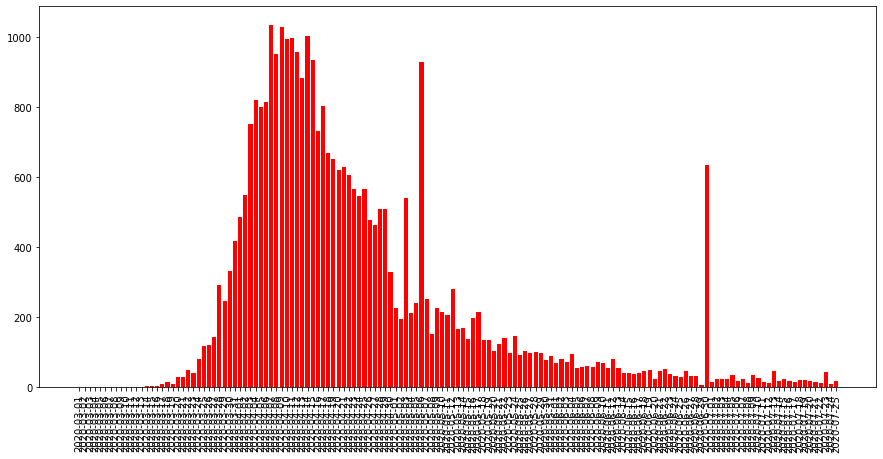

In [ ]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates, height=ny_new_deaths, color='red')
plt.xticks(rotation=90)
plt.show()

This graph also show spikes in weeks other than in April on 5/6/20 and 6/30/20.

New York data in last 30 days

In [ ]:
ny_cases_30 = ny_df['cases'][-31:-1]
ny_deaths_30 = ny_df['deaths'] [-31:-1]
ny_dates_30 = ny_df['date'][-31:-1]
ny_new_cases_30 = ny_df['new_cases'][-31:-1]
ny_new_deaths_30 = ny_df['new_deaths'][-31:-1]

In [ ]:
# ny_dates_30

New Cases

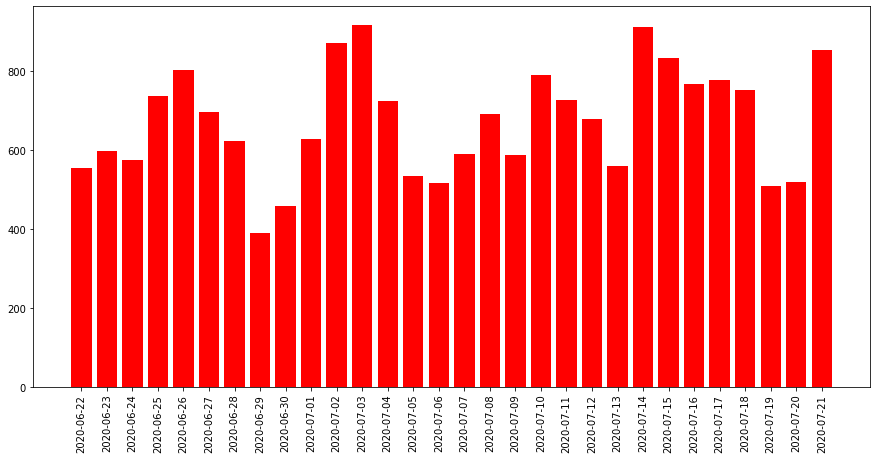

In [ ]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_new_cases_30, color='red')
plt.xticks(rotation=90)
plt.show()

^At a closer look, in the last 30 days, new cases range up to 900 as compared to the peak in April reaching over 12,000 one day.

New deaths

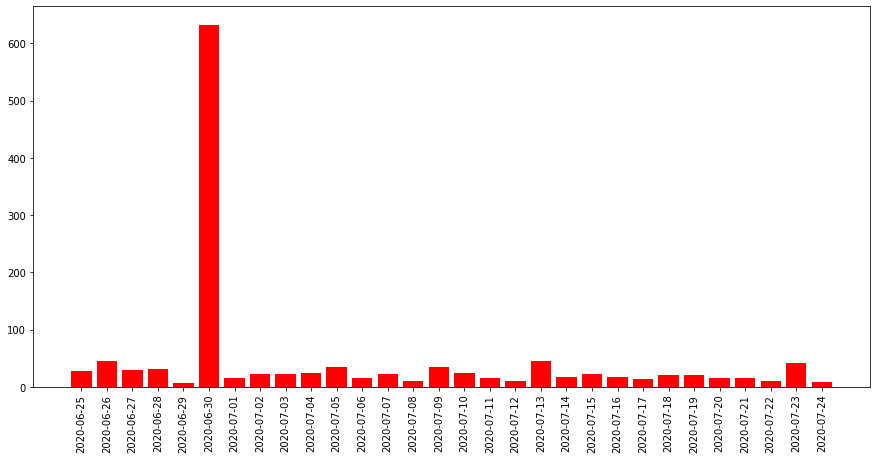

In [ ]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_new_deaths_30, color='red')
plt.xticks(rotation=90)
plt.show()

Spike in new deaths is shown on 6/30/2020.

In [ ]:
states = ['New York', 'California','Florida', 'Texas','Arizona','Georgia']


Comparing new cases in New York to other states, CA, FL, TX, AZ, and GA

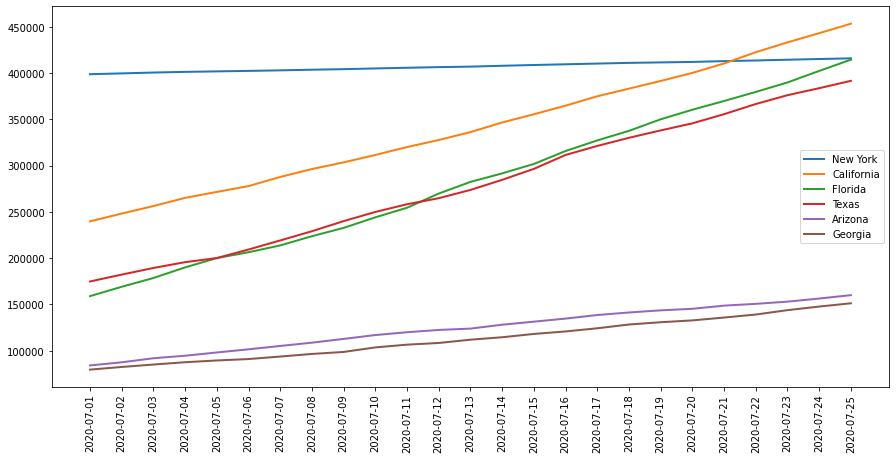

In [ ]:
plt.figure(figsize=(15,7))
for state in states:
  df_st = df[(df['state']==state) & (df['date']>='2020-07-01')]
  plt.plot(df_st['date'],
           df_st['cases'],
           linewidth=2
           )
  plt.xticks(rotation=90)
plt.legend(states)
plt.show()


The cases in NY remain to be flat in July while CA, FL, TX, AZ, and GA show an increase in cases, with CA surpassing NY in cumulative cases.

Comparing new deaths in New York to other states, CA, FL, TX, AZ, and GA

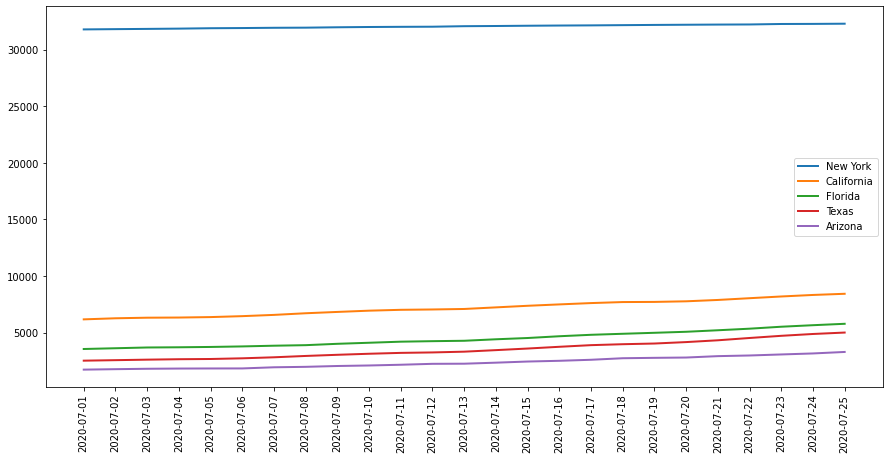

In [ ]:
plt.figure(figsize=(15,7))
for state in states:
  df_st = df[(df['state']==state) & (df['date']>='2020-07-01')]
  plt.plot(df_st['date'],
           df_st['deaths'],
           linewidth=2
           )
  plt.xticks(rotation=90)
plt.legend(states)
plt.show()

The deaths in NY remain to be flat in July while CA, FL, TX, AZ, and GA show a slight upward trend.

**Conclusion**

The first reported coronavirus case was in Washington State on Jan. 21, 2020.  The first case reported in New York (NY) was on March 1, 2020.  The first death in NY was on March 14, 2020.  As of July 25, there are 415,911 cases and 32,295 deaths in New York.  The peak of the pandemic in NY was in April, with week 15 having 67,340 new cases and 6781 new deaths.  In May, total new cases and new deaths fell sharply and continue to deline in the months after, stabilizing to date in NY.  The 2 anomalies in new deaths on 5/6/20 and 6/30/20 are considered and confirmed in NYTimes raw data.

New cases in NY remain to be flat in July while CA, FL, TX, AZ, and GA show an increase in cases.